# Задание

### Преподаватель: 
Олег Булыгин, Даниил Корбут, Наталья Баданина

### Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

### Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

### Этапы работы:
1. Сгенерируйте данные с помощью кода: 
```python
    from sklearn.datasets import make_classification  
    x_data_generated, y_data_generated = make_classification(scale=1)
```
2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:  
```python
    cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
```

3. Используйте статистические методы для отбора признаков:  
a) Выберите признаки на основе матрицы корреляции.  
b) Отсеките низковариативные признаки (VarianceThreshold).  
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.  

4. Осуществите отбор признаков на основе дисперсионного анализа:  
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).  
b) Повторите п. 2 на отобранных признаках.    

5. Отбор с использованием моделей:  
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.  
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_importances_.  
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.   

6. Перебор признаков:  
a) SequentialFeatureSelector.  
b) Повторите п. 2 на отобранных признаках.  

7. Сформулируйте выводы по проделанной работе:  
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.


Для получения зачета по этому домашнему заданию минимально должны быть:
- сгенерированы данные;
- использовано хотя бы три метода для отбора признаков;
- выведена средняя точность модели на каждом множестве отобранных признаков.

### Результат:
Получены знания по основным методам отбора признаков.

### Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

### Инструменты:
- Jupyter Notebook/Google Colab;
- GitHub.

### Срок выполнения: 
дедлайн приема решений на проверку
*Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.


### 1. Сгенерируйте данные с помощью кода: 
```python
    from sklearn.datasets import make_classification  
    x_data_generated, y_data_generated = make_classification(scale=1)
```

In [27]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification  

x_data_generated, y_data_generated = make_classification(scale=1)
# Со значениями атрибутов по умолчанию make_classification создает списки X и Y из 100 элементов.
# Каждый элемент списка X - список из 20 чисел float64, каждый элемент списка Y - 0 или 1

# Несколько проверок того, что сгенерировано
print(len(x_data_generated))
print(x_data_generated[0])
print(len(x_data_generated[0]))
print(y_data_generated)


100
[ 6.67458878e-02 -1.77582865e+00  9.54039206e-01  7.97216408e-02
 -1.85126007e-01 -3.27970102e-02  8.18220515e-02 -2.18654932e-01
  1.43835275e+00 -1.09290163e-03  2.05651854e-01 -4.28485265e-01
 -8.33128922e-01 -4.02615258e-01 -7.74185783e-01 -3.63787297e-01
 -1.26583134e+00 -1.09557523e+00  6.23377310e-01 -5.66282658e-01]
20
[1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0]


### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:  
```python
    cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
```


In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# about cross validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# print(cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean())

In [60]:
# Созданим вспомогательные функции, которые позволят копить статистику по отбору признаков и выводить информацию
stat = {}
def get_score(description, X, Y):    
    score = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy').mean()
    cols = len(X[0])
    return {'description': description, 'score': score, 'cols': cols}

def print_score(cur_score):
    print(f"Точность: {cur_score['score']}, Колонки: {cur_score['cols']}, {cur_score['description']}")

In [74]:
default_score = get_score('Исходный датасет без оптимизации', x_data_generated, y_data_generated)
stat['default'] = default_score
print_score(default_score)

Точность: 0.9399999999999998, Колонки: 20, Исходный датасет без оптимизации


### 3. Используйте статистические методы для отбора признаков:  
a) Выберите признаки на основе матрицы корреляции.  
b) Отсеките низковариативные признаки (VarianceThreshold).  
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

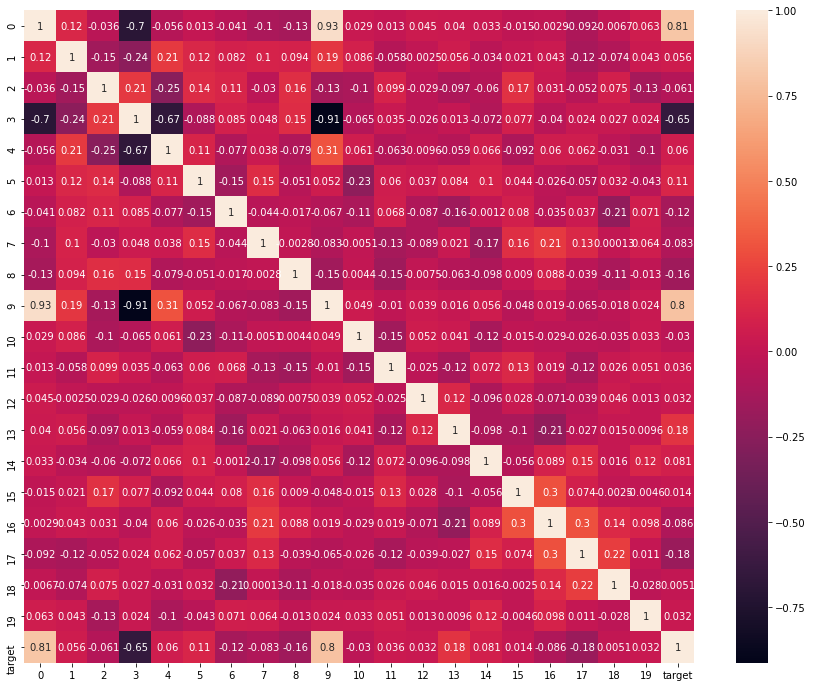

In [36]:
# 3.a Выберите признаки на основе матрицы корреляции.
data = pd.DataFrame(x_data_generated)
data['target'] = pd.Series(y_data_generated)
# data.head()
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

In [51]:
# c) Повторите п. 2 на отобранных признаках в п. 3a
# Установив условный порог для модуля корреляции в 0.1 оставлю признаки 0, 3, 8, 9, 13, 17 
# Смотрю правый крайний столбик, в котором видна корреляция целевой переменной с каждой из колонок.
# Чем выше корреляция, тем больше соответствующий признак должен влиять на точность предсказания.
corr_cols = (0, 3, 5, 6, 8, 9, 13, 17)
x_data_corr = [[item for index, item in enumerate(items) if index in corr_cols] for items in x_data_generated]
print(x_data_corr)


[[0.06674588780027646, 0.07972164079999605, -0.03279701022764226, 0.08182205153004109, 1.4383527486246266, -0.0010929016311550174, -0.4026152580738936, -1.0955752275147181], [-1.845608691923339, 1.1753604733275147, 0.33327744322011715, -0.2995476267422298, 1.3226706768434617, -1.2172932064029889, -0.05351732030923098, 0.24324946112566753], [0.11334733392673613, -0.5408001606662436, 2.2393131311445837, 0.23177999853187883, -1.7729912785489563, 0.24773151828620663, -1.6774234177235305, -0.5874522191973843], [2.845649179933554, -1.2203717073260636, 0.7617194790457359, -0.2577808121246628, 0.13661975352508568, 1.6584203553210892, 0.4793301191108682, -1.4278184095900845], [-0.8819980425555171, -0.09891416652854079, -0.5479935507589915, -0.11507709543181673, -0.1502131474673056, -0.3378939788588549, 0.022806394031475996, 0.786251275599667], [1.6492455675141757, -1.3467584379028816, 2.782154163371021, -0.4590273390645637, -0.7189580738359139, 1.1972030108587408, -1.1158560991191544, 0.5262382

In [75]:
corr_score = get_score('Датасет, оптимизированный на основе матрицы корреляции', x_data_corr, y_data_generated)
stat['corr'] = corr_score
print_score(corr_score)

Точность: 0.95, Колонки: 8, Датасет, оптимизированный на основе матрицы корреляции


In [65]:
# b) Отсеките низковариативные признаки (VarianceThreshold).
# минимизация признакового пространства на основе FutureSelection. Довольно произвольно выбрал порог threshold равным 0.9
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = .90)
X_mod = selector.fit_transform(x_data_generated)
print(len(X_mod[0]))
print(len(X_mod))
print(X_mod)

12
100
[[ 0.06674589 -1.77582865  0.95403921 ... -0.3637873  -1.26583134
   0.62337731]
 [-1.84560869  0.26476844 -2.05788382 ... -0.85714024  0.02272648
  -0.75539382]
 [ 0.11334733  0.04231226  1.08199831 ... -0.02293677 -0.77283119
   0.65405087]
 ...
 [ 1.61616839  0.51679362  0.99422283 ... -0.9871879  -0.28095512
   0.46591146]
 [ 1.41642693  2.42949914 -0.53710394 ...  1.37726633  1.95202544
  -0.90468654]
 [-0.81379942  1.77236233  0.4812265  ...  1.36514053 -0.67556311
  -1.51891782]]


In [76]:
fs_score = get_score('Датасет, оптимизированный на основе feature selection', X_mod, y_data_generated)
stat['feature_selection'] = fs_score
print_score(fs_score)

# При thershold = 0.9 точность немного просела.

Точность: 0.9099999999999999, Колонки: 12, Датасет, оптимизированный на основе feature selection


### 4. Осуществите отбор признаков на основе дисперсионного анализа:  
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).  
b) Повторите п. 2 на отобранных признаках. 

In [81]:
from sklearn.feature_selection import SelectKBest, chi2
x_data_generated_positive = [[10 - item for item in items] for items in x_data_generated]
X_disp_positive = SelectKBest(chi2, k=5).fit_transform(x_data_generated_positive, y_data_generated)
X_disp = [[item - 10 for item in items] for items in X_disp_positive]
print(len(X_disp[0]))
print(len(X_disp))
print(X_disp)

5
100
[[-0.0667458878002769, -0.07972164079999544, 0.0010929016311553852, 0.40261525807389376, 1.0955752275147184], [1.8456086919233385, -1.1753604733275154, 1.2172932064029887, 0.053517320309230954, -0.24324946112566792], [-0.11334733392673613, 0.5408001606662438, -0.24773151828620676, 1.6774234177235314, 0.5874522191973846], [-2.845649179933554, 1.2203717073260627, -1.6584203553210894, -0.47933011911086787, 1.4278184095900848], [0.8819980425555176, 0.0989141665285409, 0.33789397885885464, -0.022806394031476884, -0.7862512755996676], [-1.6492455675141748, 1.3467584379028814, -1.1972030108587415, 1.1158560991191546, -0.5262382059113726], [-0.5471062533395958, 1.3872206026595286, -0.7442846365572198, 0.7580413403323778, -0.3675932604589818], [-0.6683235968274133, 1.1199573979260435, -0.6970907162000088, 0.37660256431059125, 0.6621468634302197], [0.6957871457224218, -1.5644131531331489, 0.8728030155436244, -1.2965775813696787, -0.555816947522521], [-0.6700201662949112, 1.3439005230811905

In [82]:
disp_score = get_score('Датасет, оптимизированный на основе SelectKBest', X_disp, y_data_generated)
stat['SelectKBest'] = disp_score
print_score(disp_score)

# Неожиданно точность совпала с точностью для исходного датасета, в котором было в 4 раза больше колонок.

Точность: 0.9399999999999998, Колонки: 5, Датасет, оптимизированный на основе SelectKBest


In [78]:
print(stat)

{'default': {'description': 'Исходный датасет без оптимизации', 'score': 0.9399999999999998, 'cols': 20}, 'corr': {'description': 'Датасет, оптимизированный на основе матрицы корреляции', 'score': 0.95, 'cols': 8}, 'feature_selection': {'description': 'Датасет, оптимизированный на основе feature selection', 'score': 0.9099999999999999, 'cols': 12}, 'SelectKBest': {'description': 'Датасет, оптимизированный на основе SelectKBest', 'score': 0.9399999999999998, 'cols': 5}}


### 5. Отбор с использованием моделей:  
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.  
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_importances_.  
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [86]:
# a) Реализуйте отбор признаков с помощью логистической регрессии. 
# Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression()).fit(x_data_generated, y_data_generated)
print(selector.estimator_.coef_)
print(selector.threshold_)

x_sel_from_model_lr = selector.transform(x_data_generated)
x_sel_from_model_lr

[[ 2.1235578  -0.2907044  -0.04837757 -1.05485231 -0.80170082  0.1710377
  -0.60539382  0.03114737 -0.13294594  1.29080037  0.04893318 -0.24757937
   0.03699844  0.68468791  0.26024264  0.45343502 -0.34890956 -0.87272983
  -0.17853879 -0.05661205]]
0.4869592445452188


array([[ 6.67458878e-02,  7.97216408e-02, -1.85126007e-01,
         8.18220515e-02, -1.09290163e-03, -4.02615258e-01,
        -1.09557523e+00],
       [-1.84560869e+00,  1.17536047e+00,  3.30408445e-01,
        -2.99547627e-01, -1.21729321e+00, -5.35173203e-02,
         2.43249461e-01],
       [ 1.13347334e-01, -5.40800161e-01,  6.43658256e-01,
         2.31779999e-01,  2.47731518e-01, -1.67742342e+00,
        -5.87452219e-01],
       [ 2.84564918e+00, -1.22037171e+00, -1.34800087e+00,
        -2.57780812e-01,  1.65842036e+00,  4.79330119e-01,
        -1.42781841e+00],
       [-8.81998043e-01, -9.89141665e-02,  1.09386871e+00,
        -1.15077095e-01, -3.37893979e-01,  2.28063940e-02,
         7.86251276e-01],
       [ 1.64924557e+00, -1.34675844e+00,  1.24765526e-01,
        -4.59027339e-01,  1.19720301e+00, -1.11585610e+00,
         5.26238206e-01],
       [ 5.47106253e-01, -1.38722060e+00,  1.37386115e+00,
        -1.07928243e+00,  7.44284637e-01, -7.58041340e-01,
         3.6759326

In [87]:
sfm_lr_score = get_score('Датасет, оптимизированный на основе SelectFromModel (LogisticRegression)', x_sel_from_model_lr, y_data_generated)
stat['SelectFromModel_LR'] = sfm_lr_score
print_score(sfm_lr_score)

Точность: 0.9199999999999999, Колонки: 7, Датасет, оптимизированный на основе SelectFromModel (LogisticRegression)


In [106]:
# b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_importances_. 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_data_generated, y_data_generated)
selector_rf = SelectFromModel(rf)
selector_rf.fit(x_data_generated, y_data_generated)

print(f'Важность признаков (их сумма должна быть равна 1):\n{rf.feature_importances_}')
print(f'Порог отсечения: {selector_rf.threshold_}')

x_sel_from_model_rf = selector_rf.transform(x_data_generated)
x_sel_from_model_rf

Важность признаков (их сумма должна быть равна 1):
[0.33134318 0.01460581 0.0117993  0.17117698 0.03869625 0.00830065
 0.01636206 0.02332556 0.02045079 0.21749449 0.01278285 0.01073222
 0.01722099 0.02345283 0.01323763 0.02507857 0.01547207 0.01680882
 0.00810466 0.00355429]
Порог отсечения: 0.05


array([[ 6.67458878e-02,  7.97216408e-02, -1.09290163e-03],
       [-1.84560869e+00,  1.17536047e+00, -1.21729321e+00],
       [ 1.13347334e-01, -5.40800161e-01,  2.47731518e-01],
       [ 2.84564918e+00, -1.22037171e+00,  1.65842036e+00],
       [-8.81998043e-01, -9.89141665e-02, -3.37893979e-01],
       [ 1.64924557e+00, -1.34675844e+00,  1.19720301e+00],
       [ 5.47106253e-01, -1.38722060e+00,  7.44284637e-01],
       [ 6.68323597e-01, -1.11995740e+00,  6.97090716e-01],
       [-6.95787146e-01,  1.56441315e+00, -8.72803016e-01],
       [ 6.70020166e-01, -1.34390052e+00,  7.80471092e-01],
       [ 1.37552725e+00, -1.46211353e+00,  1.12358974e+00],
       [ 5.68588041e-01,  4.95371538e-01,  5.85154234e-02],
       [-8.41413848e-01,  1.77923865e+00, -1.01391569e+00],
       [-1.13563243e+00,  1.45216979e+00, -1.01808505e+00],
       [-1.18996850e+00,  3.12667879e-01, -6.20546176e-01],
       [-1.01184754e+00,  1.85283138e+00, -1.11342806e+00],
       [ 1.35823891e-01, -9.19916641e-01

In [108]:
sfm_rf_score = get_score('Датасет, оптимизированный на основе SelectFromModel (RandomForest)', x_sel_from_model_rf, y_data_generated)
stat['SelectFromModel_RF'] = sfm_rf_score
print_score(sfm_rf_score)

Точность: 0.9199999999999999, Колонки: 3, Датасет, оптимизированный на основе SelectFromModel (RandomForest)


### 6. Перебор признаков:  
a) SequentialFeatureSelector.  
b) Повторите п. 2 на отобранных признаках.  

In [111]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5)
sfs.fit(x_data_generated, y_data_generated)

x_seq_feature_selector = sfs.transform(x_data_generated)
x_seq_feature_selector

array([[ 6.67458878e-02, -1.85126007e-01, -1.09290163e-03,
         2.05651854e-01, -4.02615258e-01],
       [-1.84560869e+00,  3.30408445e-01, -1.21729321e+00,
        -5.36070384e-01, -5.35173203e-02],
       [ 1.13347334e-01,  6.43658256e-01,  2.47731518e-01,
        -7.29678672e-01, -1.67742342e+00],
       [ 2.84564918e+00, -1.34800087e+00,  1.65842036e+00,
        -1.14712390e-01,  4.79330119e-01],
       [-8.81998043e-01,  1.09386871e+00, -3.37893979e-01,
        -2.17806385e-01,  2.28063940e-02],
       [ 1.64924557e+00,  1.24765526e-01,  1.19720301e+00,
        -3.27647733e-01, -1.11585610e+00],
       [ 5.47106253e-01,  1.37386115e+00,  7.44284637e-01,
         7.54753666e-01, -7.58041340e-01],
       [ 6.68323597e-01,  8.64118978e-01,  6.97090716e-01,
         1.48942031e-02, -3.76602564e-01],
       [-6.95787146e-01, -1.46414138e+00, -8.72803016e-01,
        -4.18174940e-01,  1.29657758e+00],
       [ 6.70020166e-01,  1.17957433e+00,  7.80471092e-01,
        -4.33190005e-02

In [112]:
sfs_score = get_score('Датасет, оптимизированный на основе SequentialFeatureSelector', x_seq_feature_selector, y_data_generated)
stat['SequentialFeatureSelector'] = sfs_score
print_score(sfs_score)

Точность: 0.93, Колонки: 5, Датасет, оптимизированный на основе SequentialFeatureSelector


### 7. Сформулируйте выводы по проделанной работе:  
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [115]:
for ind, method in stat.items():
    print_score(method)

Точность: 0.9399999999999998, Колонки: 20, Исходный датасет без оптимизации
Точность: 0.95, Колонки: 8, Датасет, оптимизированный на основе матрицы корреляции
Точность: 0.9099999999999999, Колонки: 12, Датасет, оптимизированный на основе feature selection
Точность: 0.9399999999999998, Колонки: 5, Датасет, оптимизированный на основе SelectKBest
Точность: 0.9199999999999999, Колонки: 7, Датасет, оптимизированный на основе SelectFromModel (LogisticRegression)
Точность: 0.9199999999999999, Колонки: 3, Датасет, оптимизированный на основе SelectFromModel (RandomForest)
Точность: 0.93, Колонки: 5, Датасет, оптимизированный на основе SequentialFeatureSelector


Неожиданно самым удачным с точки зрения точности оказался результат с визуальным анализом матрицы корреляций.
Удалось отобрать 8 признаков, которые позволили получить самую высокую точность. Скорее всего, просто повезло.

При использовании метода SelectKBest удалось на пяти отобранных с помощью этого метода колонках фактически повторить точность при оптимизации исходного датасета, содержащего 20 колонок. Тоже по-своему неожиданный результат.

Близким по точности оказался и вариант оптимизации с помощью SequentialFeatureSelector. В этом методе также были отобраны 5 колонок, но немного других.

Наименее эффективным оказался метод VarianceThreshold. Видимо это произошло не из-за низкого качества этого метода, а из-за неудачно заданного мною параметра Threshold (0.9). Можно было бы, почти наверняка, улучшить показатель, плавно смещая Threshold в сторону 0.8

Еще один вывод - в этом ДЗ удалось проверить эффективность всего нескольких методов, а их, похоже, десятки (см. здесь: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
Есть куда расти.